### Checkpoint 2 e 3 | Redes Neurais Artificiais, Deep Learning e Algoritmos Genéticos

### Importação das bibliotecas e dos dados

In [49]:
# Apenas para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Separação dos dados
from sklearn.model_selection import train_test_split

# Padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Métricas de avaliação
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 

from matplotlib import pyplot as plt
from matplotlib import pyplot

import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 

In [50]:
imoveis = pd.read_csv('https://tinyurl.com/alugueis-sp-df')

In [51]:
imoveis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### Visualização das primeiras linhas

In [52]:
imoveis.tail(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046
13639,161987,0,44,2,1,0,1,0,0,0,0,Jardim Ângela/São Paulo,sale,apartment,-23.613391,-46.523109


### Filtrando apenas imóveis a venda

Verificando como está a distribuição do tipo de anúncio na base

In [53]:
print(imoveis['Negotiation Type'].value_counts())
print('-------------------------------------')
print(imoveis['Negotiation Type'].value_counts(normalize=True))

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64
-------------------------------------
rent    0.529912
sale    0.470088
Name: Negotiation Type, dtype: float64


In [ ]:
# filtrando apenas os imóveis a venda

In [25]:
# imoveis.query('`Negotiation Type` == "sale"',inplace=True)

#### Dividindo os dados da coluna District para termos os dados separados nas colunas District and City com isso podemos fazer nossa previsão por distritos e cidades

In [54]:
imoveis[['District','City']] = imoveis['District'].str.split('/', expand = True)

#### Quantos apartamentos por distritos?

In [55]:
imoveis['District'].value_counts()

Moema              293
Mooca              288
Brás               255
Brooklin           250
Bela Vista         250
                  ... 
Jardim São Luis     44
São Rafael          44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

#### Há valores inconsistentes, pois a cidade de São Paulo está localizada em -23° Latitude / -46° Longitude

In [56]:
imoveis[imoveis['Longitude'] > -10]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,City
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi,sale,apartment,0.0,0.0,São Paulo
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo


#### Dados sem coordenadas foram definidos com valor zero.

In [57]:
imoveis[imoveis['Latitude'] < -30]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,City
1113,1300,637,50,2,2,1,1,1,0,0,0,Jabaquara,rent,apartment,-46.648904,-23.652027,São Paulo
1211,2200,500,30,1,2,1,1,1,0,1,0,Moema,rent,apartment,-46.655399,-23.607013,São Paulo
1583,2600,974,76,2,2,1,2,1,1,1,0,Alto de Pinheiros,rent,apartment,-46.715115,-23.540783,São Paulo
1792,1400,580,60,3,2,1,1,1,0,1,0,Jaguaré,rent,apartment,-46.749039,-23.545329,São Paulo
1937,4200,800,97,2,3,1,2,1,1,1,0,Perdizes,rent,apartment,-46.678478,-23.534683,São Paulo
1962,4000,360,35,1,2,1,1,1,1,1,0,Pinheiros,rent,apartment,-46.700223,-23.568745,São Paulo
3667,3000,585,85,2,2,1,1,0,0,1,0,Jabaquara,rent,apartment,-34.625124,-58.364352,São Paulo
5545,380000,528,48,2,2,1,2,1,0,0,0,Consolação,sale,apartment,-46.648555,-23.548484,São Paulo
6888,490000,1000,89,2,2,1,1,0,0,0,0,Cambuci,sale,apartment,-46.626667,-23.577821,São Paulo
9773,1100,200,45,2,2,1,1,0,1,0,0,Vila Curuçá,rent,apartment,-46.428927,-23.517640,São Paulo


#### Aqui podemos ver os valores com a posição investida (Latitude x Longitude)

In [58]:
imoveis[(imoveis['Longitude'] == 0) | (imoveis['Latitude'] == 0)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,City
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda,rent,apartment,0.0,0.0,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi,sale,apartment,0.0,0.0,São Paulo
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara,sale,apartment,0.0,0.0,São Paulo


#### Há um total de 881 valores de coordenadas ausentes e vários outros com valores errados. Mas como os dados estão localizados por distritos consideramos que é suficiente para agrupar estes dados. Assim podemos diminuir as coordenadas para evitar erros no modelo preditivo futuro, mas assumindo que distritos é suficiente para categorizá-los.

In [59]:
imoveis = imoveis.drop(['Latitude', 'Longitude'], axis=1)

In [60]:
imoveis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,City
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,São Paulo


### Análises preliminares
#### Quantidade de linhas e colunas

In [61]:
imoveis.shape

(13640, 15)

#### Informações sobre as variáveis númericas

In [62]:
imoveis.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000


#### Tratando a variavel price para facilitar as análises preliminares

In [63]:
imoveis['Price'] = imoveis['Price'] / 1000
imoveis['Price'].describe()

count    13640.000000
mean       287.737784
std        590.821417
min          0.480000
25%          1.858750
50%          8.100000
75%        360.000000
max      10000.000000
Name: Price, dtype: float64

#### Verificando quantas variáveis são númericas e quantas não são

In [64]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  float64
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  City              13640 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.6+ MB


#### Histograma das variáveis numéricas

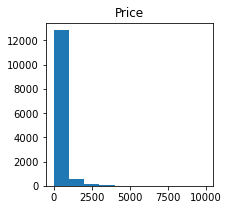

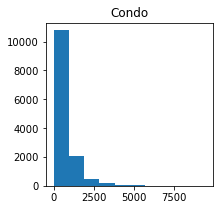

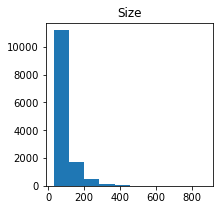

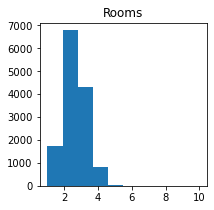

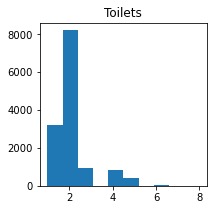

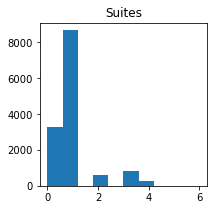

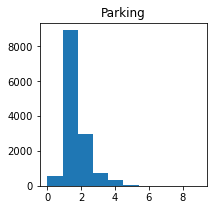

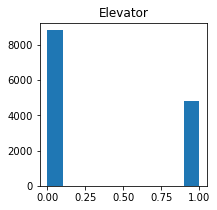

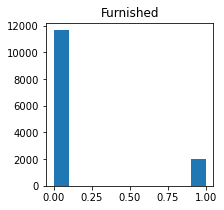

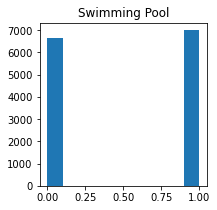

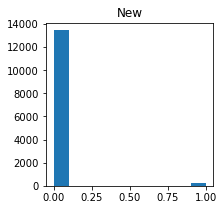

In [65]:
for col in imoveis.columns: 
    if imoveis.dtypes[col] in ('int64','float64'):
        fig = plt.figure(figsize =(3, 3))
        plt.title(col)
        pyplot.hist(imoveis[col])
        pyplot.show()

#### Visualização do box splot de cada uma das variavéis númericas

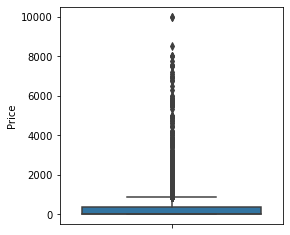

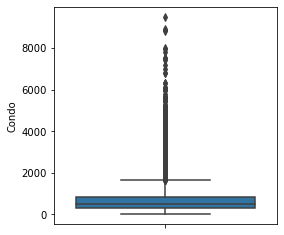

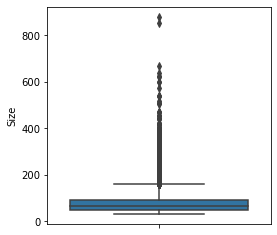

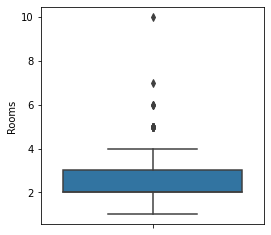

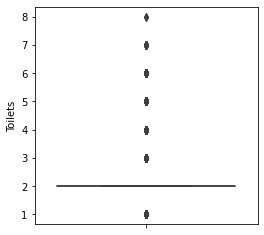

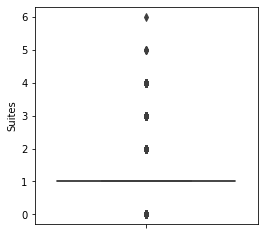

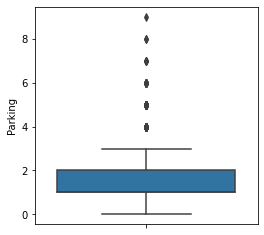

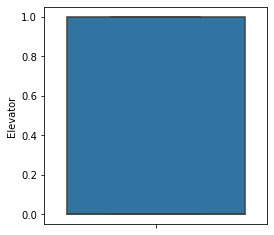

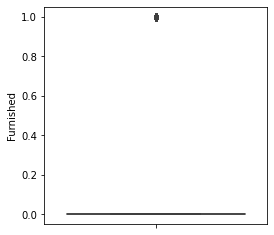

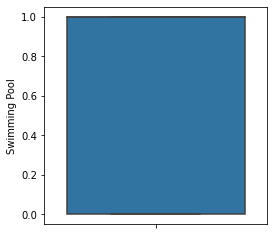

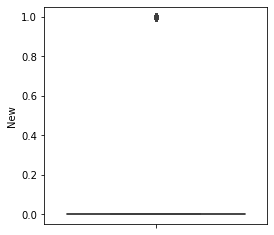

In [66]:
for col in imoveis.columns:
    if imoveis.dtypes[col] in ('int64','float64'):
        fig = plt.figure(figsize =(4, 4))
        ax = sns.boxplot(y=imoveis[col])

#### Verificação de dados faltantes para todas as colunas

In [67]:
imoveis.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
City                0
dtype: int64

#### Gráfico de barras para variáveis pertinentes

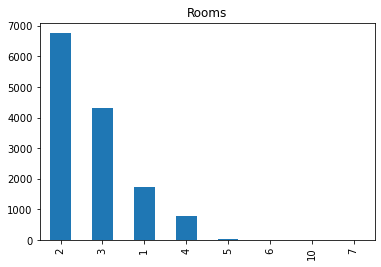

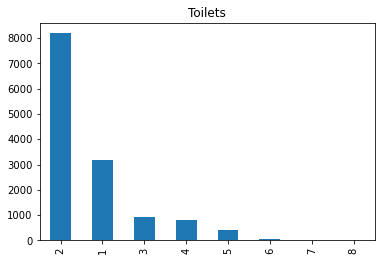

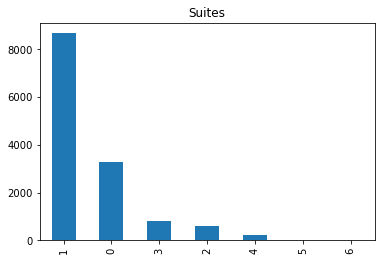

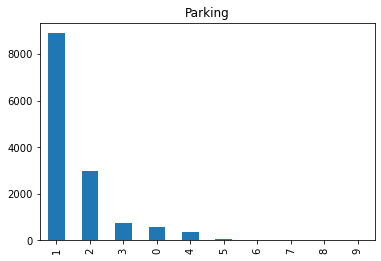

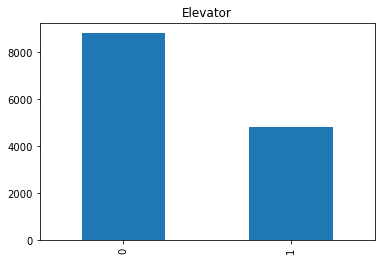

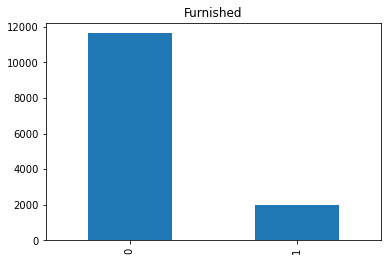

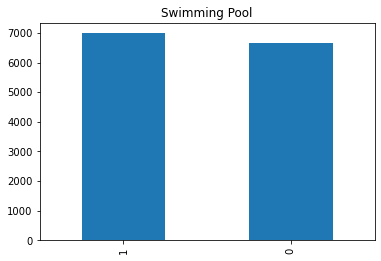

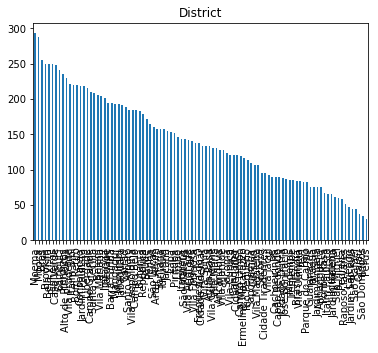

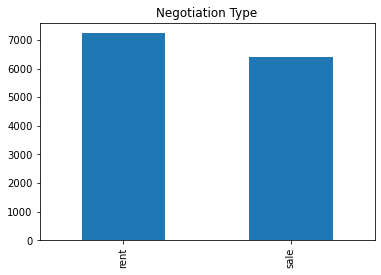

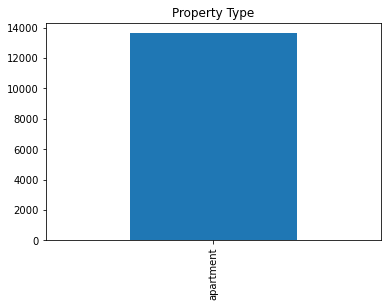

In [68]:
cols = ['Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool','District','Negotiation Type','Property Type']
for col in cols:    
    imoveis[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [69]:
imoveis['District'].value_counts().reset_index() 

,index,District
0,Moema,293
1,Mooca,288
2,Brás,255
3,Brooklin,250
4,Bela Vista,250
...,...,...
91,Jardim São Luis,44
92,São Rafael,44
93,Grajaú,37
94,São Domingos,35


#### <font color=red n> Obs: Há um certo desequilíbrio na quantidade de registros por região, Iguatemi, por exemplo, possui apenas 20 registros, enquanto Casa Verde possui 149.

#### Teste de Shapiro para verificarmos se de fato não há uma distribuição normal para os dados númericos

In [70]:
variavel_normal = 0
variavel_nao_normal = 0

from scipy.stats import shapiro
for col in imoveis.columns: 
    if imoveis.dtypes[col] in ('int64','float64'):
        stat, p = shapiro(imoveis[col])
        print(col)
        print('Statistics=%.3f, p=%.23f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Distribuição Normal')
            variavel_normal += 1
        else:
            print('Distribuição não normal')
            variavel_nao_normal += 1
        print("----------------------------")
quantidade_variaveis = variavel_normal + variavel_nao_normal
resultado_shapiro,distribuicao_normal = ("seguem uma distribuição normal",1) \
                                        if variavel_normal > variavel_nao_normal \
                                        else ("não seguem uma distribuição normal",0)
print(f'Com base na análise das {quantidade_variaveis} variáveis numéricas através do teste de Shapiro, \n' 
      f'foi possível verificar que a maioria das variáveis {resultado_shapiro}. \n'
      f'Quantidade variáveis que seguem uma distribuição normal:{variavel_normal} \n'
      f'Quantidade variáveis que não seguem uma distribuição normal:{variavel_nao_normal} \n')

Price
Statistics=0.491, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Condo
Statistics=0.722, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Size
Statistics=0.695, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Rooms
Statistics=0.851, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Toilets
Statistics=0.744, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Suites
Statistics=0.723, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Parking
Statistics=0.709, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Elevator
Statistics=0.605, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Furnished
Statistics=0.422, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Swimming Pool
Statistics=0.636, p=0.00000000

### Análises até o momento
- Pelo histograma e pelo teste de Shapiro foi possível verificar que nenhuma das variáveis seguem uma distribuição normal.
- Sendo assim o recomendável seria utilizar a padronização.
- Não há nenhum dado faltante que exija tratamento.
- Dados sobre a "Price": Média de 608k, mínimo de 42k, máximo de 10MM, 25% dos dados até 250k, 50% até 380k, 75% até 679k e há outliers.

### Exclusão de colunas desnecessárias

#### Variável Negoatiation Type possui apenas os imóveis a venda, sendo então uma coluna inútil.

In [71]:
imoveis['Negotiation Type'].unique() 

array(['rent', 'sale'], dtype=object)

#### Property Type possui apenas os imóveis que são apartamento, sendo também uma coluna inútil.

In [72]:
imoveis['Property Type'].unique()

array(['apartment'], dtype=object)

#### Usando o label encoder tradicional

In [73]:
le = LabelEncoder()
imoveis["Negotiation_Type_encoder"] = le.fit_transform(imoveis["Negotiation Type"])

In [74]:
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,City,Negotiation_Type_encoder
0,0.930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
1,1.000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
2,1.000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
3,1.000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
4,1.300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,0,Jabaquara,sale,apartment,São Paulo,1
13636,545.000,630,74,3,2,1,2,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1
13637,515.000,1100,114,3,3,1,1,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1
13638,345.000,48,39,1,2,1,1,0,1,1,0,Jabaquara,sale,apartment,São Paulo,1


### Transformando categóricas em dummies e verificando quais colunas são as mais importantes

In [75]:
imoveis2 = pd.get_dummies(imoveis, columns=['District'])

In [76]:
imoveis2

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Jacuí,District_Vila Leopoldina,District_Vila Madalena,District_Vila Maria,District_Vila Mariana,District_Vila Matilde,District_Vila Olimpia,District_Vila Prudente,District_Vila Sônia,District_Água Rasa
0,0.930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,545.000,630,74,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13637,515.000,1100,114,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13638,345.000,48,39,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Criando o dataframe "imoveis_final", que é a concatenação linha a linha dos dataframes imoveis e imoveis2

In [77]:
imoveis_final = pd.concat([imoveis, imoveis2], axis=1)

In [78]:
imoveis_final

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Jacuí,District_Vila Leopoldina,District_Vila Madalena,District_Vila Maria,District_Vila Mariana,District_Vila Matilde,District_Vila Olimpia,District_Vila Prudente,District_Vila Sônia,District_Água Rasa
0,0.930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,545.000,630,74,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13637,515.000,1100,114,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13638,345.000,48,39,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,City,Negotiation_Type_encoder
0,0.930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
1,1.000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
2,1.000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
3,1.000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
4,1.300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,0,Jabaquara,sale,apartment,São Paulo,1
13636,545.000,630,74,3,2,1,2,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1
13637,515.000,1100,114,3,3,1,1,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1
13638,345.000,48,39,1,2,1,1,0,1,1,0,Jabaquara,sale,apartment,São Paulo,1


#### Limpando o dataframe final

In [80]:
# imoveis.drop(['Negotiation Type','Property Type'], axis=1)
imoveis_final.drop(['District', 'Negotiation Type', 'Property Type', 'City'], axis=1, inplace=True)

In [81]:
imoveis_final

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Jacuí,District_Vila Leopoldina,District_Vila Madalena,District_Vila Maria,District_Vila Mariana,District_Vila Matilde,District_Vila Olimpia,District_Vila Prudente,District_Vila Sônia,District_Água Rasa
0,0.930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,545.000,630,74,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13637,515.000,1100,114,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13638,345.000,48,39,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Correlação sem distritos

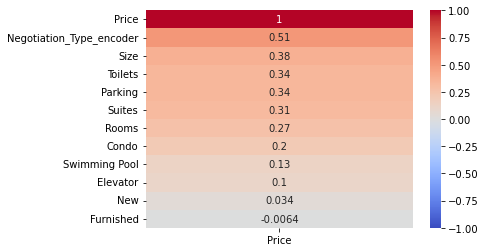

In [82]:
upp_mat = np.triu(imoveis.corr())
sns.heatmap(imoveis.corr()[['Price']].sort_values(by='Price', ascending=False), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

#### Correlação com distritos

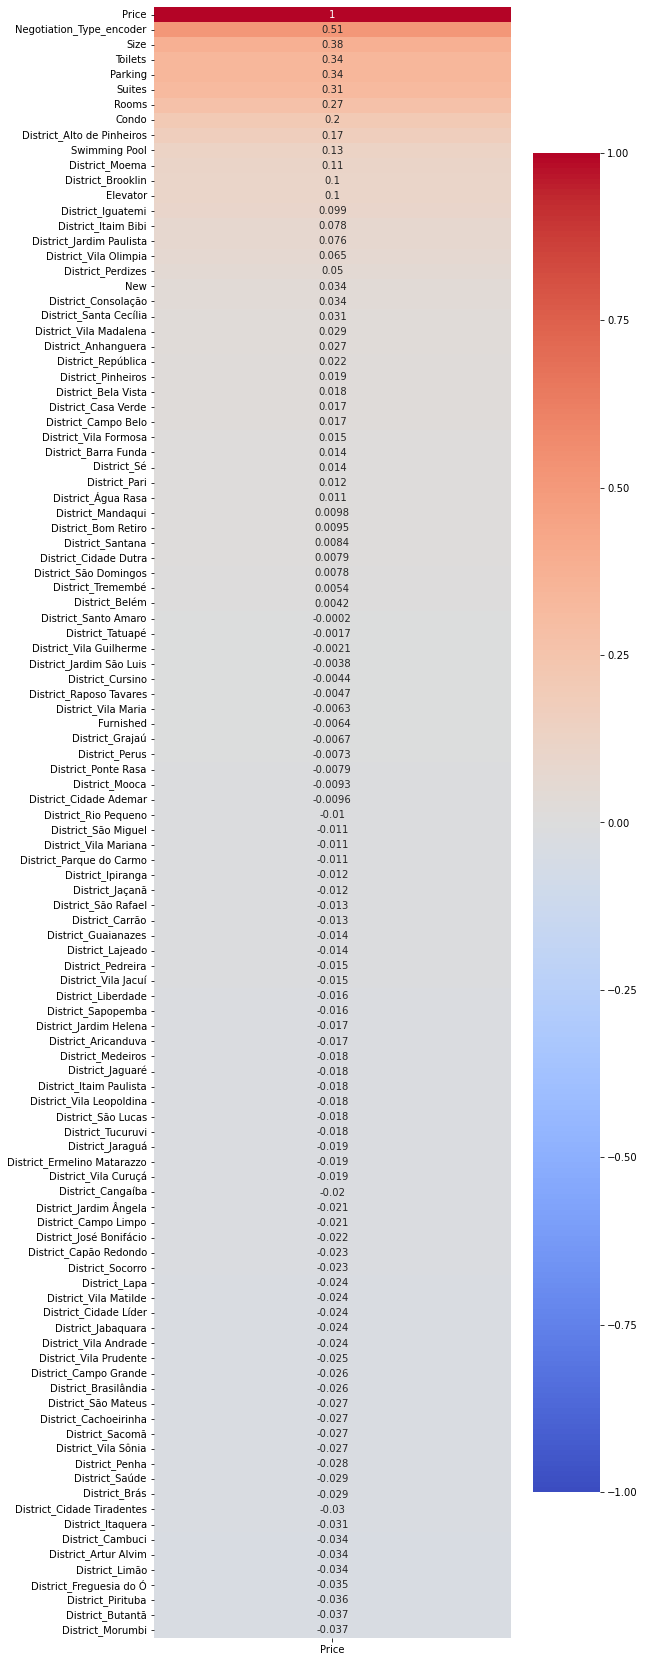

In [83]:
plt.figure(figsize=(8, 30))
upp_mat = np.triu(imoveis2.corr())
sns.heatmap(imoveis2.corr()[['Price']].sort_values(by='Price', ascending=False), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

### Padronização e Divisão de Treino e Teste

In [84]:
x = imoveis_final.drop(columns=["Price"])
y = imoveis_final["Price"]

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [85]:
#Padronização
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 1º Modelo

In [86]:
def cria_modelo(x_train, x_test, y_train, y_test):
    
    mlp = MLPRegressor(hidden_layer_sizes=(4,2),
                      random_state=1,
                      max_iter=5000)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    print(f"MSE: { round(mean_squared_error(y_pred, y_test), 2)}")
    print(f"MAE: { round(mean_absolute_error(y_pred, y_test), 2)}")
    print(f"R²: { round(r2_score(y_pred, y_test), 2)}")

In [ ]:
cria_modelo(x_train, x_test, y_train, y_test)

### 2º Modelo - Dados Padronizados

In [ ]:
# Treina e avalia o modelo nos dados padronizados 
cria_modelo(x_train_scaled, x_test_scaled, y_train, y_test)

### 3º Modelo - Grid Search com dados padronizados

In [ ]:
%%time

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          #'hidden_layer_sizes': list(itertools.permutations([50,100,150],2)),
          'hidden_layer_sizes': [(10,30,10),(20,)],
          'solver': ['adam', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(x_train_scaled,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_train_scaled, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_test_scaled, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(10,30,10),
                  random_state=123,
                  max_iter=5000,
                  activation='relu',
                  learning_rate='constant',
                  solver='adam'
                  )
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)
print(f"MSE: { round(mean_squared_error(y_pred, y_test), 2)}")
print(f"MAE: { round(mean_absolute_error(y_pred, y_test), 2)}")
print(f"R²: { round(r2_score(y_pred, y_test), 2)}")

### 4º Modelo - Incrementar a base com o preço do metro quadrado por região + Grid Search com dados padronizados

In [87]:
metro_quadrado = pd.read_csv("preco_metro_quadrado_sp.csv") #Importar base de metro quadrado

In [88]:
metro_quadrado.tail(2) #Primeiras linhas

,Campo_Original,Bairro_Tratado,VLR_M_Quadrado
94,Vila Prudente/São Paulo,Vila Prudente,6809
95,Vila Sônia/São Paulo,Vila Sônia,7306


In [89]:
metro_quadrado['VLR_M_Quadrado'].describe() #Verificando se os valores fazem sentido do metro quadrado

count       96.000000
mean      7182.979167
std       3185.879999
min       2692.000000
25%       4995.750000
50%       6402.500000
75%       8139.750000
max      18658.000000
Name: VLR_M_Quadrado, dtype: float64

In [90]:
metro_quadrado.isnull().sum() #Verificando se há dados faltantes

Campo_Original    0
Bairro_Tratado    0
VLR_M_Quadrado    0
dtype: int64

In [91]:
imoveis.shape #Verificando o imovel que será utilizado para popularmos com as informações de metro quadrado 

(13640, 16)

In [92]:
imoveis.head(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,City,Negotiation_Type_encoder
0,0.93,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0
1,1.00,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0


In [93]:
imoveis = imoveis.merge(metro_quadrado,left_on='District', right_on='Campo_Original', how='left') #Trazendo o valor de m²

In [94]:
imoveis.query('VLR_M_Quadrado.isnull()', engine='python') #Verificando o metro quadrado foi preenchido para todos os casos

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,City,Negotiation_Type_encoder,Campo_Original,Bairro_Tratado,VLR_M_Quadrado
0,0.930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0,NaN,NaN,NaN
1,1.000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0,NaN,NaN,NaN
2,1.000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0,NaN,NaN,NaN
3,1.000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,São Paulo,0,NaN,NaN,NaN
4,1.300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,São Paulo,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265.000,420,51,2,1,0,1,0,0,0,0,Jabaquara,sale,apartment,São Paulo,1,NaN,NaN,NaN
13636,545.000,630,74,3,2,1,2,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1,NaN,NaN,NaN
13637,515.000,1100,114,3,3,1,1,0,0,1,0,Jabaquara,sale,apartment,São Paulo,1,NaN,NaN,NaN
13638,345.000,48,39,1,2,1,1,0,1,1,0,Jabaquara,sale,apartment,São Paulo,1,NaN,NaN,NaN


In [95]:
imoveis['VLR_M_Quadrado'].describe()  #Verificando o metro quadrado foi preenchido para todos os casos

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: VLR_M_Quadrado, dtype: float64

In [96]:
imoveis.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'City', 'Negotiation_Type_encoder',
       'Campo_Original', 'Bairro_Tratado', 'VLR_M_Quadrado'],
      dtype='object')

In [ ]:
#Criando dummies
imoveis.drop(columns=['Campo_Original', 'Bairro_Tratado'],inplace=True)
imoveis2 = pd.get_dummies(imoveis, columns=['District'])
x = imoveis2.drop(columns=["Price"])  
y = imoveis2["Price"]                 

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)
#Padronização
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(10,30,10),
                  random_state=123,
                  max_iter=5000,
                  activation='relu',
                  learning_rate='constant',
                  solver='lbfgs'
                  )
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)
print(f"MSE: { round(mean_squared_error(y_pred, y_test), 2)}")
print(f"MAE: { round(mean_absolute_error(y_pred, y_test), 2)}")
print(f"R²: { round(r2_score(y_pred, y_test), 2)}")

### 5º Modelo - Base com metro quadrado + Grid Search com dados padronizados

In [ ]:
%%time

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(8,6,5),(20,)],
          'solver': ['adam', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(x_train_scaled,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_train_scaled, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_test_scaled, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(8,6,5),
                  random_state=123,
                  max_iter=5000,
                  activation='relu',
                  learning_rate='constant',
                  solver='adam'
                  )
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)
print(f"MSE: { round(mean_squared_error(y_pred, y_test), 2)}")
print(f"MAE: { round(mean_absolute_error(y_pred, y_test), 2)}")
print(f"R²: { round(r2_score(y_pred, y_test), 2)}")

### Modelo - Usando caso real